## Sales Dashboard


#### What happened since 2019?

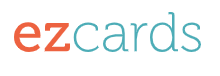

In [90]:
from IPython.display import Image
remote_image = Image('logo.png')
display(remote_image)

In [91]:
# def hide_code_in_slideshow():   
#     from IPython import display
#     import binascii
#     import os
#     uid = binascii.hexlify(os.urandom(8)).decode()    
#     html = """<div id="%s"></div>
#     <script type="text/javascript">
#         $(function(){
#             var p = $("#%s");
#             if (p.length==0) return;
#             while (!p.hasClass("cell")) {
#                 p=p.parent();
#                 if (p.prop("tagName") =="body") return;
#             }
#             var cell = p;
#             cell.find(".input").addClass("hide-in-slideshow")
#         });
#     </script>""" % (uid, uid)
#     display.display_html(html, raw=True)

In [92]:
# !pip install pandas
# !pip install mysql-connector-python
# !pip install mysqltotsv
# !pip install pymysql
# !pip install ipython-sql
# !pip install matplotlib
# !pip install seaborn
# !pip install numpy
# !pip install scikit-surprise
# !pip install ipywidgets
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager
# !pip install pygal.maps.world
# !pip install plotly.express
# !pip install "notebook>=5.3" "ipywidgets>=7.5"
# !pip install plotly-geo==1.0.0
# !pip install plotly
# !pip install cufflinks
# !pip install requests pandas plotly chart-studio python-dotenv
# !pip install pycountry
# !pip install chart_studio
# !pip install mlxtend
# !pip install nltk
# !pip install pycountry-convert
# !pip install implicit
# !pip install lightfm
# !pip install mplcursors
# !pip install nbconvert
# !pip install RISE

In [93]:
import glob, os, json
import csv
import pandas as pd
import re
import mysql.connector
import pymysql
pymysql.install_as_MySQLdb()
import MySQLdb
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import matplotlib.colors as mcolors
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import pygal
from pygal_maps_world.maps import World
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import cufflinks as cf
import plotly
import plotly.tools 
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default='notebook'
from collections import Counter
import datetime
from IPython.core.display import HTML
import time
from datetime import datetime, date, time, timedelta

In [94]:
# import warnings
# warnings.filterwarnings("ignore")

In [95]:
# hide_code_in_slideshow()
#id and pass for BtoB
user = 'readonly'
password = 'MwLvD9DFL8mnrTKkI6fU' 
host = '127.0.0.1'
port = 3335

In [96]:
conn = pymysql.connect(
    host=host,
    user=user,
    password=password,
    charset='utf8mb4',
    port=int(3335))
    #database=database,
    #port=int(3306))

cursor = conn.cursor()

In [97]:
#query SQL
#db = customers
#table = 'accounts'
query = """
            SELECT i.sales_order_id, i.id AS id, i.quantity, i.product_id, i.state AS state_i, i.status, i.created_at, i.external_unit_price,
                       p.id AS sku_id, p.sku, p.name, p.description, p.currency, p.brand_id, p.face_price, p.country, b.name AS name_i,
                       o.date, o.invoice_number, o.state AS state_o, o.company_currency_id, cc.company_id AS cust_id, cc.display_name AS name_o, a.city, a.country AS country_o, x.finance_number, x.sales_order_id AS sales_order_id_o
                        FROM (SELECT *
                              FROM ezscm_production.sales_order_items
                              WHERE created_at > '2023-01-01')  AS i
                        LEFT OUTER JOIN (SELECT *
                                         FROM ezscm_production.sales_orders
                                         WHERE date > '2023-01-01') AS o
                            ON o.id = i.sales_order_id
                        LEFT OUTER JOIN ezscm_production.products AS p
                            ON p.id = i.product_id
                        LEFT OUTER JOIN ezscm_production.brands AS b
                            ON p.brand_id = b.id
                        LEFT OUTER JOIN ezscm_production.company_currencies AS cc
                            ON o.company_currency_id = cc.id
                        LEFT OUTER JOIN ezscm_production.companies AS c
                            ON cc.company_id = c.id
                        LEFT OUTER JOIN ezscm_production.addresses AS a
                            ON c.billing_address_id = a.id
                        LEFT OUTER JOIN ezscm_production.invoices AS x
                            ON o.invoice_number = x.finance_number
                            
                            ORDER BY id ASC

"""

In [98]:
#connect cursor
cursor.execute(query)
rows = cursor.fetchall()

In [99]:
df = pd.read_sql(query,conn)
df.head(3)

,sales_order_id,id,quantity,product_id,state_i,status,created_at,external_unit_price,sku_id,sku,name,description,currency,brand_id,face_price,country,name_i,date,invoice_number,state_o,company_currency_id,cust_id,name_o,city,country_o,finance_number,sales_order_id_o
0,18354,109677,20,1062,fulfilled,0,2023-01-03 10:34:22,"{""amount"": 905, ""currency"": ""USD""}",1062,NES10,Nintendo eShop $10 (USA),Nintendo eShop $10 (USA),USD,7,10.0,US,NINTENDO ESHOP,2023-01-03,INV18354,complete,58.0,62.0,PSNTHAILAND,Bangbon,TH,INV18354,18354.0
1,18354,109678,10,1064,fulfilled,0,2023-01-03 10:34:22,"{""amount"": 1805, ""currency"": ""USD""}",1064,NES20,Nintendo eShop $20 (USA),Nintendo eShop $20 (USA),USD,7,20.0,US,NINTENDO ESHOP,2023-01-03,INV18354,complete,58.0,62.0,PSNTHAILAND,Bangbon,TH,INV18354,18354.0
2,18354,109679,10,1065,fulfilled,0,2023-01-03 10:34:22,"{""amount"": 3130, ""currency"": ""USD""}",1065,NES35,Nintendo eShop $35 (USA),Nintendo eShop $35 (USA),USD,7,35.0,US,NINTENDO ESHOP,2023-01-03,INV18354,complete,58.0,62.0,PSNTHAILAND,Bangbon,TH,INV18354,18354.0


In [100]:
df.to_csv('/Users/laetitiahoquetis/Downloads/Python/Dashboard/current.csv', index=False)

In [144]:
df = pd.read_csv('/Users/laetitiahoquetis/Downloads/Python/Dashboard/current.csv')

In [102]:
dfa = pd.read_csv('/Users/laetitiahoquetis/Downloads/Python/Dashboard/pastfour.csv')

In [145]:
df.columns

Index(['sales_order_id', 'id', 'quantity', 'product_id', 'state_i', 'status',
       'created_at', 'external_unit_price', 'sku_id', 'sku', 'name',
       'description', 'currency', 'brand_id', 'face_price', 'country',
       'name_i', 'date', 'invoice_number', 'state_o', 'company_currency_id',
       'cust_id', 'name_o', 'city', 'country_o', 'finance_number',
       'sales_order_id_o'],
      dtype='object')

In [146]:
dfa.columns

Index(['sales_order_id', 'date', 'id', 'created_at', 'quantity', 'sku', 'name',
       'name_i', 'face_price', 'currency', 'country', 'state_i', 'state_o',
       'status', 'external_unit_price', 'name_o', 'city', 'country_o', 'year',
       'month', 'day', 'weekday', 'price', 'total', 'net_price', 'net_income',
       'percent_margin', 'season'],
      dtype='object')

In [147]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [148]:
df.sample()

,sales_order_id,id,quantity,product_id,state_i,status,created_at,external_unit_price,sku_id,sku,name,description,currency,brand_id,face_price,country,name_i,date,invoice_number,state_o,company_currency_id,cust_id,name_o,city,country_o,finance_number,sales_order_id_o
7426,19679,117104,3,1253,fulfilled,0,2023-06-19 11:18:58,"{""amount"": 2497, ""currency"": ""EUR""}",1253,PSN30,PlayStation Network Card €30 (Italy),PlayStation Network Card €30 (Italy),EUR,3,30.0,IT,SONY,2023-06-19,INV19679,fulfilling,162.0,186.0,PLAY-ASIA.COM (EUR),Lai Chi Kok,HK,NaN,NaN


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8243 entries, 0 to 8242
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sales_order_id       8243 non-null   int64  
 1   id                   8243 non-null   int64  
 2   quantity             8243 non-null   int64  
 3   product_id           8243 non-null   int64  
 4   state_i              8243 non-null   object 
 5   status               8243 non-null   int64  
 6   created_at           8243 non-null   object 
 7   external_unit_price  8243 non-null   object 
 8   sku_id               8243 non-null   int64  
 9   sku                  8243 non-null   object 
 10  name                 8243 non-null   object 
 11  description          6832 non-null   object 
 12  currency             8243 non-null   object 
 13  brand_id             8243 non-null   int64  
 14  face_price           8243 non-null   float64
 15  country              8013 non-null   o

In [150]:
df[df['state_i']=='deleted'].head()

,sales_order_id,id,quantity,product_id,state_i,status,created_at,external_unit_price,sku_id,sku,name,description,currency,brand_id,face_price,country,name_i,date,invoice_number,state_o,company_currency_id,cust_id,name_o,city,country_o,finance_number,sales_order_id_o
182,18379,109859,300,1120,deleted,0,2023-01-04 10:52:06,"{""amount"": 1868, ""currency"": ""USD""}",1120,STM20,Steam Wallet Card $20 (USA),Steam Wallet Card $20 (USA),USD,11,20.0,US,VALVE,2023-01-04,INV18379,complete,64.0,72.0,JS Music Corporation,Mayfield Village,US,INV18379,18379.0
183,18379,109860,300,1121,deleted,0,2023-01-04 10:52:06,"{""amount"": 4850, ""currency"": ""USD""}",1121,STM50,Steam Wallet Card $50 (USA),Steam Wallet Card $50 (USA),USD,11,50.0,US,VALVE,2023-01-04,INV18379,complete,64.0,72.0,JS Music Corporation,Mayfield Village,US,INV18379,18379.0
1330,18583,111007,10,1081,deleted,0,2023-01-30 14:17:47,"{""amount"": 905, ""currency"": ""USD""}",1081,RBLX10,Roblox Gift Card $10 (USA),Roblox Gift Card $10 (USA),USD,39,10.0,US,ROBLOX,2023-01-30,INV18583,complete,27.0,28.0,Onequark SPA,Santiago,CL,INV18583,18583.0
2275,18758,111952,50,1049,deleted,0,2023-02-22 09:37:47,"{""amount"": 975, ""currency"": ""USD""}",1049,IT10,Apple Gift Card $10 (USA),Apple Gift Card $10 (USA),USD,2,10.0,US,APPLE,2023-02-22,NaN,deleted,31.0,32.0,Gudang ePayment Inc.,Singapore,SG,NaN,NaN
2276,18758,111953,30,1051,deleted,0,2023-02-22 09:37:47,"{""amount"": 1462, ""currency"": ""USD""}",1051,IT15,Apple Gift Card $15 (USA),Apple Gift Card $15 (USA),USD,2,15.0,US,APPLE,2023-02-22,NaN,deleted,31.0,32.0,Gudang ePayment Inc.,Singapore,SG,NaN,NaN


In [151]:
def preprocess_data(df):
    df = df[['sales_order_id','date','id','created_at','quantity','sku','name','name_i','face_price','currency', 
                    'country','state_i', 'state_o','status','external_unit_price', 'name_o',
                   'city', 'country_o']]
    df["created_at"] = df["created_at"].astype('datetime64[ns]')
    df["date"] = pd.to_datetime(df["date"])
    df[['year', 'month', 'day', 'weekday']] = df['created_at'].apply(lambda x: pd.Series([x.year, x.month, x.day, x.day_name()]))
    df[['quantity',  'id']] = df[['quantity','id']].astype('Int64')
    #df[['product_id', 'customer_company_id']] = df[[ 'product_id', 'customer_company_id']].astype('Int64')
    df['face_price'] = df['face_price'].astype('float').round(2)
    df['price'] = df['external_unit_price'].str.extract('(\d+)').astype('float') / 100
    df['price'] = df['price'].round(2)
    df['total'] = (df['quantity'] * df['price']).round(2)
    df['net_price'] = df['face_price'] - df['price']
    df['net_income'] = (df['quantity'] * df['net_price']).round(2) 
    df['percent_margin'] = (df['net_price']/df['face_price']*100).astype('float').round(2)
    df = df[~df['state_i'].isin(['deleted', 'cancelled'])]
    df.sort_values(['created_at'],ascending=[True])
    return df


In [152]:
df = preprocess_data(df)

In [153]:
dfa = preprocess_data(dfa)

In [154]:
df["created_at"] = df["created_at"].astype('datetime64[ns]')
dfa["created_at"] = dfa["created_at"].astype('datetime64[ns]')

In [155]:
#seasonality
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df['day'] = df['created_at'].dt.day

In [156]:
dfa['year'] = dfa['created_at'].dt.year
dfa['month'] = dfa['created_at'].dt.month

In [157]:
season_mapping = {
    1: 'Winter', 2: 'Winter', 12: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}

df['season'] = df['month'].map(season_mapping)
dfa['season'] = dfa['month'].map(season_mapping)

In [158]:
#items influenced by seasonality
filtered_dfi = df[['sku', 'quantity', 'month']].copy()
grouped_dfi = filtered_dfi.groupby(['sku', 'month']).agg({'quantity': 'sum'}).reset_index()
pivot_dfi = grouped_dfi.pivot(index='sku', columns='month', values='quantity').fillna(0)

In [159]:
#clients influenced by seasonality
filtered_dfn = df[['name_o', 'sku', 'quantity', 'season']].copy()
grouped_dfn = filtered_dfn.groupby(['name_o', 'season']).agg({'quantity': 'sum'}).reset_index()
pivot_dfn = grouped_dfn.pivot(index='name_o', columns='season', values='quantity').fillna(0)

In [160]:
#apply clustering
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(pivot_dfn)

In [161]:
clusters

array([0, 3, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 0, 2], dtype=int32)

In [162]:
# Create a new column 'cluster' in filtered_df and assign the cluster labels
df['client_season_cluster'] = df['name_o'].map(dict(zip(pivot_dfn.index, clusters)))

In [163]:
#clusters
# Filter the data based on a specific cluster
cluster_0 = df[df['client_season_cluster'] == 0]
cluster_1 = df[df['client_season_cluster'] == 1]
cluster_2 = df[df['client_season_cluster'] == 2]

In [164]:
# Group all products by subcategory name, year, and week.
# Group shopper purchases into baskets, by grouping on user id and basket hash.
# Randomly sample one item from the full group that is in the same subcategory as the item in the shopper's basket, and not already in the shopping basket.
# Fill in the rows of the new products with data of the remaining columns from the original product except for price.
# Calculate the most frequent price at which a particular product was sold in a particular week and year. For prices that are unavailable we use the previous week's price, and if still unavailable, we use the following week's price (Molnar et al., 2008).
# Mark sampled products as not bought, by assigning a bought value of 0.

In [165]:
#analyze 
cluster_1.groupby('name_o').describe()

sales_order_id                                     \
                                   count          mean         std      min   
name_o                                                                        
BASATNE INTERNATIONAL LLC          248.0  19009.685484  439.061981  18357.0   

                                                                   id  \
                                25%      50%      75%      max  count   
name_o                                                                  
BASATNE INTERNATIONAL LLC  18623.75  18939.5  19478.0  19819.0  248.0   

                                                                         \
                                   mean        std       min        25%   
name_o                                                                    
BASATNE INTERNATIONAL LLC  113367.03629  2456.9323  109695.0  111205.75   

                                                        quantity              \
                                50%       75%       max    count        mean   
name_o                                                                         
BASATNE INTERNATIONAL LLC  112958.5  116010.0  117890.0    248.0  923.927419   

                                                                             \
                                   std   min    25%    50%     75%      max   
name_o                                                                        
BASATNE INTERNATIONAL LLC  1477.086037  25.0  200.0  500.0  1000.0  10000.0   

                          face_price                                         \
                               count       mean       std   min   25%   50%   
name_o                                                                        
BASATNE INTERNATIONAL LLC      248.0  46.350806  33.04533  10.0  25.0  50.0   

                                       status                                \
                            75%    max  count mean  std  min  25%  50%  75%   
name_o                                                                        
BASATNE INTERNATIONAL LLC  62.5  110.0  248.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                 year                                       \
                           max  count    mean  std     min     25%     50%   
name_o                                                                       
BASATNE INTERNATIONAL LLC  0.0  248.0  2023.0  0.0  2023.0  2023.0  2023.0   

                                           month                           \
                              75%     max  count      mean       std  min   
name_o                                                                      
BASATNE INTERNATIONAL LLC  2023.0  2023.0  248.0  3.270161  1.907687  1.0   

                                                 day                       \
                           25%  50%  75%  max  count       mean       std   
name_o                                                                      
BASATNE INTERNATIONAL LLC  2.0  3.0  5.0  7.0  248.0  16.241935  8.738552   

                                                        price             \
                           min   25%   50%   75%   max  count       mean   
name_o                                                                     
BASATNE INTERNATIONAL LLC  1.0  8.75  16.0  23.0  31.0  248.0  41.371976   

                                                                          \
                                 std   min    25%    50%      75%    max   
name_o                                                                     
BASATNE INTERNATIONAL LLC  29.492065  8.93  22.31  44.63  55.7825  98.18   

                           total                                               \
                           count          mean           std    min       25%   
name_o                                                                          
BASATNE INTERNATIONAL LLC  248.0  21561.217823  21411.48495

In [166]:
df.client_season_cluster.value_counts()

0.0    3828
2.0    2342
3.0    1681
1.0     248
Name: client_season_cluster, dtype: int64

In [167]:
df.sample()

,sales_order_id,date,id,created_at,quantity,sku,name,name_i,face_price,currency,country,state_i,state_o,status,external_unit_price,name_o,city,country_o,year,month,day,weekday,price,total,net_price,net_income,percent_margin,season,client_season_cluster
1772,18662,2023-02-09,111449,2023-02-09 11:10:56,60,PSN10,PlayStation Network Card $10 (CAN),SONY,10.0,CAD,CA,fulfilled,complete,0,"{""amount"": 950, ""currency"": ""CAD""}",OffGamers Global Pte Ltd (CAD),NaN,SG,2023,2,9,Thursday,9.5,570.0,0.5,30.0,5.0,Winter,2.0


In [168]:
#deviation of their order quantities from the average order quantity for each season, to get client sensivity to seasonality


In [181]:
# Group by 'name_o', 'season', and 'sku' and calculate the average and standard deviation of order quantity
grouped = df.groupby(['name_o','season'])['quantity'].agg(['mean', 'std']) #add to groupby  ,'sku','season'

# Merge the group statistics back to the original DataFrame
df = df.merge(grouped, on=['name_o','season'], suffixes=['', '_stats']) # add to merge on , 'season', 'sku'

# Calculate the sensitivity score for each order
df['sensitivity_score'] = (df['quantity'] - df['mean']) / df['std']

# Scale the sensitivity score to a range of 0 to 1
df['sensitivity_score'] = (df['sensitivity_score'] - df['sensitivity_score'].min()) / (df['sensitivity_score'].max() - df['sensitivity_score'].min())

# Fill any missing values in sensitivity_score with 0
df['sensitivity_score'].fillna(0, inplace=True)

In [182]:
grouped

mean          std
name_o                                    season                          
24 Games ApS                              Spring   118.402778   101.103445
                                          Summer    83.888889    66.610270
                                          Winter        136.0   157.932667
ABAAD ALJEEL DBA LIKE4CARD                Spring  1461.111111  1260.783551
                                          Winter   934.042553  1127.381845
ABAAD ALJEEL DBA LIKE4CARD (CAD)          Winter   128.571429    46.880723
ABAAD ALJEEL DBA LIKE4CARD (EUR)          Winter         80.0    27.386128
ASIA DIGITAL PTE. LTD.                    Spring        185.0   145.990266
                                          Summer        212.5    86.240942
                                          Winter   164.545455    84.718786
BASATNE INTERNATIONAL LLC                 Spring   970.977011  1419.246000
                                          Summer   833.653846  1392.327405
                                          Winter   929.440367  1569.934909
BNB CARD CO. LTD                          Spring    50.606061    25.951362
                                          Summer    43.846154    13.587324
                                          Winter    48.571429    22.062921
Bamboo Card LLC                           Spring   145.407407   221.681611
                                          Summer   207.692308    64.051262
                                          Winter   128.571429    90.632697
Blackwing s.r.o                           Summer          1.0          NaN
C2GAMES                                   Spring         35.0    21.213203
                                          Summer         30.0    15.491933
                                          Winter         35.0    39.874804
CEDAR PARK SALES LLC                      Spring   196.421277   297.642326
                                          Summer   190.957447   365.191213
                                          Winter   262.190476   391.548408
CIRCUIT ZONE LTD                          Spring    19.545455    10.568269
                                          Summer         28.0    13.038405
                                          Winter    28.181818    17.426407
COLOMBIANUP SAS                           Spring          1.0          NaN
                                          Winter    67.692308    33.454907
Comercializadora SYP Limitada             Spring   116.842105   122.431506
                                          Summer    97.272727   158.435533
                                          Winter        100.0          NaN
Comercializadora SYP Limitada (EUR)       Winter    88.333333    20.207259
ContentCard AG                            Winter    73.333333    71.589105
DEIMAN UNITED LTD                         Winter    46.923077    26.578379
DEVCO FZ LLC                              Spring       244.05   323.246746
                                          Summer        319.3   439.210068
                                          Winter       1117.0          NaN
DIGITAL CODES S.p. Z.o.o (USD.)           Spring    33.644444    41.591714
                                          Summer    53.076923    26.890090
                                          Winter    59.464286    48.152731
DISTRITECH LLC                            Spring        43.75    41.508031
                                          Winter    40.909091    41.582339
Dorah For Digital Products                Spring         19.2     7.293833
EZ CARDS                                  Winter    28.923077    63.411962
EZ Cards Distribution LLC                 Spring          8.5    14.341083
ExcelGames Interactive Pte Ltd            Spring        200.0          NaN
GAMEKEYS OU                               Spring    14.303797     6.341468
                                          Summer    11.666667     3.834825
                                          Winter    17.571429     8.917612
GAMING 

In [183]:
df.sample(3)

,sales_order_id,date,id,created_at,quantity,sku,name,name_i,face_price,currency,country,state_i,state_o,status,external_unit_price,name_o,city,country_o,year,month,day,weekday,price,total,net_price,net_income,percent_margin,season,client_season_cluster,mean,std,sensitivity_score,mean_stats,std_stats,mean_stats,std_stats,mean_stats,std_stats
7216,19630,2023-06-13,116820,2023-06-13 11:15:14,30,IT100,Apple Gift Card $100 (USA),APPLE,100.0,USD,US,fulfilled,complete,0,"{""amount"": 9747, ""currency"": ""USD""}",BNB CARD CO. LTD,BANGKOK,TH,2023,6,13,Tuesday,97.47,2924.1,2.53,75.9,2.53,Summer,2.0,38.571429,6.900656,NaN,38.571429,6.900656,48.666667,22.896674,43.846154,13.587324
4214,19424,2023-05-18,115703,2023-05-18 12:19:24,250,PSN50,PlayStation Network Card $50 (USA),SONY,50.0,USD,US,fulfilled,complete,0,"{""amount"": 4488, ""currency"": ""USD""}",Kuwait Star for General Trading Co. (USD),Fahaheal,KW,2023,5,18,Thursday,44.88,11220.0,5.12,1280.0,10.24,Spring,3.0,250.0,84.515425,NaN,250.0,84.515425,207.09965,361.162923,206.943463,395.070158
68,18817,2023-03-01,112253,2023-03-01 09:49:04,5,PSN60,PlayStation Network Card $60 (USA),SONY,60.0,USD,US,fulfilled,complete,0,"{""amount"": 5490, ""currency"": ""USD""}",PSNTHAILAND,Bangbon,TH,2023,3,1,Wednesday,54.90,274.5,5.10,25.5,8.50,Spring,2.0,6.25,2.500000,NaN,6.25,2.500000,11.928889,7.948737,12.067227,8.857374


In [58]:
# calculate the most frequent price at which a particular product 
# was sold in a respective week and year
def top_value_count(x):
    return x.value_counts().idxmax()
prices_top_freq = df.groupby(['month', 'sku'])['price']
prices = prices_top_freq.apply(top_value_count).reset_index()

In [72]:
# Pivot the prices dataframe to have months as columns and SKUs as rows
pivot_prices = prices.pivot(index='sku', columns=['month'], values='price')
pivot_prices = pivot_prices.fillna(pivot_prices.mean(axis=1))
pivot_prices.columns = pivot_prices.columns.astype(str)
pivot_prices.head()

month,1,2,3,4,5,6
sku,,,,,,
AB100,97.72,97.72,97.72,NaN,NaN,NaN
AB25,23.95,23.95,NaN,NaN,NaN,24.43
AB50,48.86,48.86,47.90,NaN,NaN,NaN
AL1000,NaN,NaN,NaN,10.7,NaN,NaN
AL2150,NaN,NaN,NaN,19.8,NaN,NaN


In [76]:
import plotly.offline as offline
data = []
for sku in pivot_prices.index:
    trace = go.Scatter(
        x=pivot_prices.columns,
        y=pivot_prices.loc[sku],
        mode='lines',
        name=sku
    )
    data.append(trace)
data
# Create the layout for the chart
layout = go.Layout(
    title='Sales per Month by SKU',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Sales'),
    legend=dict(orientation='h')
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Render the graph
offline.plot(fig, filename='sales_per_month.html')

'sales_per_month.html'

In [ ]:
# predict the price of the product
# Drop irrelevant columns and handle missing data
df = df[['sku','quantity','product_weight_g', 'product_length_cm','product_height_cm','product_width_cm','customer_state','price']]
df = df.dropna()

# Remove outliers
df = df[(df['price'] >= df['price'].quantile(0.05)) & (df['price'] <= df['price'].quantile(0.95))]

# Convert categorical variables to numerical values
df = pd.get_dummies(df, columns=['product_category_name', 'customer_state'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.2, random_state=42)

# Train a machine learning model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error:", mae)

In [ ]:
# #query SQL
# #db = customers
# #table = 'accounts'
# query = """
# SELECT i.sales_order_id, i.id, i.quantity, i.product_id, i.state, i.status, i.created_at, i.external_unit_price,
#        p.id AS sku_id, p.sku, p.name, p.description, p.currency, p.brand_id, p.face_price, p.country, b.name,
#        o.date, o.invoice_number, o.state, o.customer_company_id, c.id AS id_o, c.name AS name_o, a.city, a.country, x.finance_number, x.sales_order_id AS sales_order_id_o
#         FROM (SELECT *
#               FROM ezscm_production.sales_order_items
#               WHERE created_at BETWEEN '2019-01-01' AND '2023-12-31') AS i
#         LEFT OUTER JOIN (SELECT *
#                          FROM ezscm_production.sales_orders
#                          WHERE date BETWEEN '2019-01-01' AND '2023-12-31') AS o
#             ON o.id = i.sales_order_id
#         LEFT OUTER JOIN ezscm_production.products AS p
#             ON p.id = i.product_id
#         LEFT OUTER JOIN ezscm_production.brands AS b
#             ON p.brand_id = b.id
#         LEFT OUTER JOIN ezscm_production.companies AS c
#             ON o.customer_company_id = c.id
#         LEFT OUTER JOIN ezscm_production.addresses AS a
#             ON c.billing_address_id = a.id
#         LEFT OUTER JOIN ezscm_production.invoices AS x
#             ON o.invoice_number = x.finance_number

# """

In [ ]:
# #connect cursor
# cursor.execute(query)
# rows = cursor.fetchall()
# df = pd.read_sql(query,conn)

In [ ]:
# df.to_csv('/Users/laetitiahoquetis/Downloads/Python/Dashboard/EZIitemsFull.csv', index=False)

In [ ]:
# #query SQL
# #db = customers
# #table = 'accounts'
# query = """
# SELECT o.id , o.date, o.invoice_number, o.state, o.customer_company_id, 
# c.id , c.name, a.city, a.country, x.finance_number, x.sales_order_id

# FROM ezscm_production.sales_orders as o
# JOIN ezscm_production.companies as c
# ON o.customer_company_id = c.id

# LEFT OUTER JOIN ezscm_production.addresses as a
# ON c.billing_address_id = a.id

# LEFT OUTER JOIN ezscm_production.invoices as x
# ON o.invoice_number = x.finance_number

# WHERE o.date BETWEEN '2019-01-01' AND '2023-12-31'
# """
# cursor.execute(query)
# rows = cursor.fetchall()

In [ ]:
# Read the two CSV files into DataFrames
df1 = pd.read_csv('EZItotalFull.csv')
df2 = pd.read_csv('df.csv')

# Merge the two dataframes on the columns that you want to use for comparison
merged_df = pd.merge(df1, df2, on=['id'])

# Identify duplicates
duplicates = merged_df[merged_df.duplicated()]
duplicates

In [ ]:
df1.info()

In [ ]:
df2.info()

In [ ]:
df2 = df2.drop_duplicates()

In [ ]:
df2.info

In [ ]:
#end testing

In [ ]:
# df1 = pd.read_sql(query,conn)
# df1.to_csv('/Users/laetitiahoquetis/Downloads/Python/Dashboard/EZIordersFull.csv', index=False)

In [ ]:
df = pd.read_csv('EZItotalFull.csv')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = df.sort_index(ascending=True)
df.head(3)

In [ ]:
# #and
# df1 = pd.read_csv('EZIordersFull.csv')
# df1 = df1.sort_index(ascending=True)
# df1.head(3)

In [ ]:
#clean by date for dfatabase
from datetime import datetime
df["date"] = pd.to_datetime(df['date'],format= '%Y-%m-%d').dt.date
df["created_at"] = pd.to_datetime(df['created_at'],format= '%Y-%m-%d').dt.date
len(df["created_at"].unique()), len(df["date"].unique()),

In [ ]:
len(df.sales_order_id), df.sales_order_id.nunique(),len(df.id), df.id.nunique()

In [ ]:
df = df.sort_values(['date','id'],ascending=[True, True])
df.head(3)

In [ ]:
#clean id to be exploitable
df.sales_order_id.fillna(df.id, inplace=True)

In [ ]:
df.id = pd.to_numeric(df.id)
df.sales_order_id = pd.to_numeric(df.sales_order_id)

In [ ]:
df.sales_order_id = pd.to_numeric(df.sales_order_id,downcast='integer', errors='ignore')

In [ ]:
len(df), df.sales_order_id.nunique()

In [ ]:
dfa = df

In [ ]:
#merge the 2 datasets on id

In [ ]:
# dfa= pd.merge(
#     df1,
#     df,
#     how="outer",
#     left_on=df1["id"],
#     right_on = df["sales_order_id"],
#     sort=True,
#     suffixes=("_o", "_i"),
#     copy=True,
#     indicator=True,
#     validate=None,
# )

In [ ]:
dfa.info()

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
display.max_columns = None
display.max_rows = None
display.max_colwidth = None
display.width = None

In [ ]:
dfa[pd.isnull(dfa['name_o'])].head()

In [ ]:
len(dfa[dfa['city'].isna()])

In [ ]:
#dropping the 30 rows that have not been merged, they all are part of an order of microsoft Xbox 50 on jan 14th 2020

In [ ]:
dfa['_merge'].value_counts()

In [ ]:
#excluding the rows that do not contain customer data
dfa = dfa[dfa._merge == 'both']
len(dfa)

In [ ]:
dfa.head()

In [ ]:
#cleaning date to be exploitable
dfa["date"] = pd.to_datetime(dfa['date'],format= '%Y-%m-%d').dt.date
dfa["created_at"] = pd.to_datetime(dfa['created_at'],format= '%Y-%m-%d').dt.date
dfa = dfa.sort_values(by='date')

In [ ]:
#cleaning other columns to be exploitable
#dfa['Unnamed: 0_o'] = pd.to_numeric(dfa['Unnamed: 0_o'], downcast="integer") 
dfa['sales_order_id'] = pd.to_numeric(dfa['sales_order_id'], downcast="integer") 
dfa['customer_company_id'] = pd.to_numeric(dfa['customer_company_id'], downcast="integer") 
#dfa['id.1_o'] = pd.to_numeric(dfa['id.1_o'], downcast="integer") 
dfa['sales_order_id_o'] = pd.to_numeric(dfa['sales_order_id_o'], downcast="integer") 
#dfa['Unnamed: 0_i'] = pd.to_numeric(dfa['Unnamed: 0_i'], downcast="integer") 
#dfa['sales_order_id_i'] = pd.to_numeric(dfa['sales_order_id_i'], downcast="integer") 
#dfa['id_i'] = pd.to_numeric(dfa['id_i'], downcast="integer") 
dfa['quantity'] = pd.to_numeric(dfa['quantity'], downcast="integer") 
dfa['product_id'] = pd.to_numeric(dfa['product_id'], downcast="integer") 
#dfa['id.1_i'] = pd.to_numeric(dfa['id.1_i'], downcast="integer") 

In [ ]:
dfa = dfa.sort_values(['date','id'],ascending=[True, True])

In [ ]:
#creating more data 

In [ ]:
#creating a column that states clearly the unit price in a clean way : currency and price
#dfa['currency']= dfa['external_unit_price'].apply(lambda x: x[-5:-2])
dfa['price'] = dfa['external_unit_price'].str.extractall('(\d+)').unstack().loc[:,0]
dfa['price'] = pd.to_numeric(dfa['price'], downcast='float')
dfa['price'] = dfa['price']/100
dfa['price'] = round(dfa['price'], 2)

In [ ]:
#creating a order value column : quantity * price
dfa['total'] = dfa['quantity']*dfa['price']
dfa['total'] = round(dfa['total'],2)

In [ ]:
#splitting date into month, and day
dfa["date"] = dfa["date"].astype('datetime64[ns]')
dfa['year'] = dfa.date.dt.year
dfa['month'] = dfa.date.dt.month
dfa['day'] = dfa.date.dt.day
dfa['weekday'] = dfa.date.dt.day_name()

In [ ]:
#dfa.to_csv('EZItotalFull.csv',index=False)

In [ ]:
dfa.columns

In [ ]:
dfa.state_o.head()

### Percentage of not "completed" orders do we have?

In [ ]:
# dfa = pd.read_csv('EZItotalFull.csv')
# dfa["date"] = pd.to_datetime(dfa['date'],format= '%Y-%m-%d').dt.date
# dfa["date"] = dfa["date"].astype('datetime64[ns]')
# dfa.info()

## START

In [ ]:
#what percentage of not complete orders do we have
unsuccess = dfa[dfa['state_o']!='complete']
unsuccess.groupby('name_o').agg({'quantity':'count','total':'sum'}).sort_values(by='quantity', ascending= False).head(5)

In [ ]:
print("Over the past 4 years :",round(len(unsuccess)/len(dfa)*100,2),"%")

In [ ]:
print("What other status do we have?\n\n",dfa['state_o'].value_counts(normalize=True))

In [ ]:
#let's take ONLY the COMPLETED orders
df = dfa[dfa['state_o']=='complete']

In [ ]:
#total number of orders and #total number of items 
df.sales_order_id.nunique(), df.id.nunique()

### Up to Date Numbers

In [ ]:
yearly_sales = df.resample(on="date", rule="1Y").total.sum().rename("This_year").reset_index()
yearly_sales

In [ ]:
current_year = yearly_sales["date"].dt.year.max()

In [ ]:
# hide_code_in_slideshow()
# Plot the total sales with different colors for each year
sns.scatterplot(data=yearly_sales, x="date", y="This_year",
                hue=yearly_sales["date"].dt.year, palette="colorblind",
                size=yearly_sales["date"].dt.year.map(lambda y: 2 if y == current_year else 1),
                sizes=[200, 50], alpha=0.7)
plt.title('Yearly Gross Sales Total')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
# hide_code_in_slideshow()
#monthly sales
monthly_sales = dfa.resample(on="date", rule="1M").total.sum().rename("This_month").reset_index()
# Extract the year from the date column
monthly_sales["Year"] = monthly_sales["date"].dt.year
# Plot the monthly sales with one color per year
sns.lineplot(data=monthly_sales, x="date", y="This_month", hue="Year", palette="colorblind")
plt.title('Yearly sales as a trend')
plt.xlabel('Date')
plt.ylabel('Sales')
import mplcursors
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"Year: {sel.target[0].year}\nMonth: {sel.target[0].strftime('%B %Y')}\nSales: {sel.target[1]:,.2f}"))
plt.show()

### Can we spot seasonality?

In [ ]:
# hide_code_in_slideshow()
monthly_sales = dfa.resample(on="date", rule="1M").total.sum().rename("This_month").reset_index()
monthly_sales["Year"] = monthly_sales["date"].dt.year
monthly_sales["Month"] = monthly_sales["date"].dt.month

sns.set_style("whitegrid")
plot = sns.lineplot(data=monthly_sales, x="Month", y="This_month", hue="Year", palette="colorblind", errorbar=None, estimator=sum)
plt.title('Seasonality of those sales')
plt.xlabel('Month')
plt.ylabel('Sales')
cursor = mplcursors.cursor(plot)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"Year:{sel.artist.get_label()}\nMonth:{sel.target[0]:.0f}\nSales:{sel.target[1]:,.0f}"))
plt.show()

In [ ]:
# hide_code_in_slideshow()
sns.barplot(x = "Month", y = "This_month", hue = "Year", data = monthly_sales)
plt.title('Monthly stacked for the past 4 years')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [ ]:
monthly_sales.head()

In [ ]:
# hide_code_in_slideshow()
#variation MoM
monthly_sales['Variation'] = monthly_sales['This_month'].diff() / monthly_sales['This_month'].shift() * 100
sns.lineplot(data=monthly_sales['Variation'])
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Month-on-Month variation in % from previous month')
plt.xlabel('Period')
plt.ylabel('Variation')
plt.show()

In [ ]:
print("Variations MoM :\n\n",monthly_sales[monthly_sales['Variation']<=0].sort_values('Variation').head(10))

In [ ]:
df.head()

### SALES MtD - YtD - o/n - vs previous year 

In [ ]:
#MtD
from dateutil.relativedelta import relativedelta
now = pd.Timestamp.now()
current_day = pd.Timestamp.now().day
current_month = pd.Timestamp.now().month
current_year = pd.Timestamp.now().year
prev_year = current_year - 1
prev_month = (pd.Timestamp.now() - relativedelta(months=1)).month
two_year = current_year - 2

In [ ]:
# hide_code_in_slideshow()
sales_mtd = df[(df['month'] == current_month)&(df['year'] == current_year)]['total'].sum()
sales_mtd_last_year = df[(df['month'] == current_month)&(df['year'] == prev_year)]['total'].sum()
sales_mtd_two_year = df[(df['month'] == current_month)&(df['year'] == two_year)]['total'].sum()
percent_vs_last_year_month = sales_mtd/sales_mtd_last_year
percent_vs_two_year_month = sales_mtd/sales_mtd_two_year

In [ ]:
print("Month-to-Date"), print("Sales Amount MtD = ",sales_mtd), print("Pct done vs same month last year = ",percent_vs_last_year_month*100), print("Pct done vs 2 years ago = ",percent_vs_two_year_month*100)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 3))
labels = ['MtD','vs last year','vs 2Y ago']
category_names = [sales_mtd, sales_mtd_last_year, sales_mtd_two_year]
ax.barh(labels,category_names, height=0.5, left=None, align='center', color = 'deepskyblue')

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = percent_vs_last_year_month*100,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "% of MtD vs past year sales"}))

fig.show()

In [ ]:
# hide_code_in_slideshow()
# Calculate the YtD for this year
ytd_start = pd.to_datetime(f"{current_year}-01-01")
last_ytd_start = pd.to_datetime(f"{prev_year}-01-01")
last_ytd_end = pd.to_datetime(f"{prev_year}-{current_month}-{current_day}")
two_ytd_start = pd.to_datetime(f"{two_year}-01-01")
two_ytd_end = pd.to_datetime(f"{two_year}-{current_month}-{current_day}")

sales_ytd = df[(df['date'] >= ytd_start)]['total'].sum()
sales_ytd_last_year = df[(df['date'] >=last_ytd_start)& (df['date'] <= last_ytd_end)]['total'].sum()
sales_ytd_two_year = df[(df['date'] >=two_ytd_start)& (df['date'] <= two_ytd_end)]['total'].sum()
percent_vs_last_year_to_date = sales_ytd/sales_ytd_last_year
percent_vs_two_year_to_date = sales_ytd/sales_ytd_two_year 

In [ ]:
print("Year-to-Date"), print("Sales Amount YtD = ", sales_ytd) , print("Pct done vs same time last year = ", percent_vs_last_year_to_date), print("Pct done vs 2 year ago = ", percent_vs_two_year_to_date)

In [ ]:
# hide_code_in_slideshow()
# Calculate sales from previous workday day to today (overnight)
from datetime import datetime
today = pd.Timestamp.now().floor('D')
def prev_weekday(adate):
    adate -= timedelta(days=1)
    while adate.weekday() > 4: # Mon-Fri are 0-4
        adate -= timedelta(days=1)
    return adate

overnight_sales = dfa[(dfa['date'] >= prev_weekday(today))]['total'].sum()


In [ ]:
print("Overnight Orders, including not Complete"), print("Overnight sales = ", overnight_sales)

In [ ]:
overnight_orders = df[(df['date'] >= prev_weekday(today))]['sales_order_id'].nunique()
so_not_complete = df[(df['date'] >= prev_weekday(today))& (df['state_i']!='complete')]['sales_order_id'].nunique()
overnight_orders, so_not_complete

### For how long have the customers been with us?

In [ ]:
df['prev_order_date'] = df.groupby('sales_order_id_o')['date'].shift(1)

In [ ]:
df[df['name_o'] == 'Global Deal d.o.o'].tail()

In [ ]:
# hide_code_in_slideshow()
#How long have we got each cust 
customer_length = df.groupby('name_o').agg({'sales_order_id_o': 'nunique','date': ['min', 'max']})
customer_length['longevity'] = customer_length['date']['max'] - customer_length['date']['min']
customer_length

In [ ]:
print("Average longevity of our clients since 2019: ",customer_length.longevity.mean())

In [ ]:
# hide_code_in_slideshow()
#How long have we got each cust 
customer_snapshot = df.groupby('name_o').agg({'sales_order_id_o': 'nunique','date': ['min', 'max'],'total':'mean'})
customer_snapshot

In [ ]:
print("Average $ spent over all periods ",customer_snapshot['total'].mean())

In [ ]:
sns.displot(customer_snapshot['total'],
    hue=None,
    weights=None,
    kind='kde',
    legend=True,
    color='deepskyblue',
    height=5,
    aspect=1)

### Periodicity of each customer

In [ ]:
#Periodicity of customer order 
customer_orders = df.groupby(['name_o', 'year', 'month', 'weekday']).agg({
    'sales_order_id_o': 'nunique',
    'date': ['min', 'max']
})

In [ ]:
# hide_code_in_slideshow()
#search for specific customer
customer_names = customer_orders.index.get_level_values(0).unique()
pd.options.display.max_rows = len(customer_names)
HTML(customer_names.to_frame().to_html(index=False))

In [ ]:
from ipywidgets import widgets
from IPython.display import display
# create a text input widget
text_box = widgets.Text(
    value='',
    placeholder='Enter a customer name',
    description='Customer name:',
    disabled=False
)

display(text_box)
user_input = text_box.value

# Display the user's input
print(f'for customer, {user_input}...')

In [ ]:
customer_name = input()

In [ ]:
print("Please enter a customer name: ",customer_name)

In [ ]:
# hide_code_in_slideshow()
#prompt
customer_name = input("Please enter a customer name: ")
#customer_name= "Global Deal d.o.o"

When does he usually order?

In [ ]:
customer_orders.loc[customer_name]

In [ ]:
customer_orders = customer_orders.reset_index()
customer_orders.columns = ['name_o', 'year', 'month', 'weekday', 'orders_count', 'first_order', 'last_order']

In [ ]:
customer_orders[customer_orders['name_o']=='ABAAD ALJEEL DBA LIKE4CARD'].tail()

In [ ]:
#Periodicity by weekday month year
weekdays = customer_orders.groupby(['name_o', 'weekday']).agg({'orders_count': 'sum'})
months = customer_orders.groupby(['name_o', 'month']).agg({'orders_count': 'sum'})
years = customer_orders.groupby(['name_o', 'year']).agg({'orders_count': 'sum'})

In [ ]:
weekdays.head(3)

In [ ]:
months.loc[('ABAAD ALJEEL DBA LIKE4CARD')]

In [ ]:
client_1 = years.loc[('Global Deal d.o.o')].reset_index()
client_1

In [ ]:
fig, ax = plt.subplots()
size = 0.3

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(x=client_1['orders_count'], labels=client_1['year'],radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(client_1['orders_count'], radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Global Deal d.o.o')
plt.show()

In [ ]:
# hide_code_in_slideshow()
#Visu
years = customer_orders.groupby(['name_o', 'year']).agg({'orders_count': 'sum'})
year_pivot = years.pivot_table(index='name_o', columns='year', values='orders_count')

fig, ax = plt.subplots(figsize=(10, 45))
sns.heatmap(year_pivot, cmap='Blues', annot=True, fmt='g', ax=ax, annot_kws={"size": 12})
plt.title('Orders per Customer by Year', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Customer', fontsize=16)

fig.savefig('heatmap.png')

In [ ]:
from IPython.display import IFrame
IFrame(src='./heatmap.png', width=800, height=600, scrolling=True)

In [ ]:
# go to the terminal and navigate to the directory where your Jupyter notebook is saved.
# cd Downloads/Python/Dashboard/

# Run the following command to convert your Jupyter notebook to a HTML presentation:
# jupyter-nbextension install rise --py --sys-prefix
# jupyter-nbextension enable rise --py --sys-prefix

# jupyter nbconvert Sales_DB.ipynb --to slides --post serve

In [ ]:
# jupyter nbconvert Sales_DB.ipynb --to slides --no-input --post serve

In [ ]:
# {
#  ...
#  "rise": {"scroll": true}
# }